In [1]:
import pandas as pd
import numpy as np
import xgboost as xgb
import networkx as nx
from pandas import HDFStore,DataFrame
from pandas import read_hdf
import os

import warnings
warnings.filterwarnings("ignore")

import csv
import pandas as pd#pandas to create small dataframes 
import datetime #Convert to unix time
import time #Convert to unix time
# if numpy is not installed already : pip3 install numpy
import numpy as np#Do aritmetic operations on arrays
# matplotlib: used to plot graphs
import matplotlib
import matplotlib.pylab as plt
import seaborn as sns#Plots
from matplotlib import rcParams#Size of plots  
from sklearn.cluster import MiniBatchKMeans, KMeans#Clustering
import math
import pickle
import os
from sklearn.metrics import roc_auc_score, f1_score
# to install xgboost: pip3 install xgboost
import xgboost as xgb

import warnings
import networkx as nx
import pdb
import pickle
from pandas import HDFStore,DataFrame
from pandas import read_hdf
from scipy.sparse.linalg import svds, eigs
import gc
from tqdm import tqdm
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from xgboost import XGBClassifier

In [2]:
df = pd.read_csv('after_eda/train_pos_after_eda.csv')

In [3]:
df_final_train = read_hdf('fea_sample\storage_sample_stage4.h5', 'train_df',mode='r')
df_final_test = read_hdf('fea_sample\storage_sample_stage4.h5', 'test_df',mode='r')

## Preferrential Attachment

In [4]:
if os.path.isfile('after_eda/train_pos_after_eda.csv'):
    train_graph=nx.read_edgelist('after_eda/train_pos_after_eda.csv',delimiter=',',create_using=nx.DiGraph(),nodetype=int)
    print(nx.info(train_graph))
else:
    print("please run the FB_EDA.ipynb or download the files from drive")

Name: 
Type: DiGraph
Number of nodes: 1780722
Number of edges: 7550015
Average in degree:   4.2399
Average out degree:   4.2399


In [5]:
def pref_attachment_followers(a, b):
    try:
        if len(set(train_graph.predecessors(a))) == 0  | len(set(train_graph.predecessors(b))) == 0:
            return 0 # afar i can tell, this case is if there is no difference in both the sets, exactly same
        
        pref =  len(set(train_graph.predecessors(a))) * len(set(train_graph.predecessors(b)))
        
    except:
        return 0
    return pref 

In [6]:
def pref_attachment_followees(a, b):
    try:
        if len(set(train_graph.successors(a))) == 0  | len(set(train_graph.successors(b))) == 0:
            return 0 # afar i can tell, this case is if there is no difference in both the sets, exactly same
        
        pref =  len(set(train_graph.successors(a))) * len(set(train_graph.successors(b)))
        
    except:
        return 0
    return pref 

Add feature called svd_dot. you can calculate svd_dot as Dot product between sourse node svd and destination node svd features. you can read about this in below pdf https://storage.googleapis.com/kaggle-forum-message-attachments/2594/supervised_link_prediction.pdf

## SVD dot

### Train

In [7]:
x1 = list(df_final_train['svd_u_s_1'])
x2 = list(df_final_train['svd_u_s_2'])
x3 = list(df_final_train['svd_u_s_3'])
x4 = list(df_final_train['svd_u_s_4'])
x5 = list(df_final_train['svd_u_s_5'])
x6 = list(df_final_train['svd_u_s_6'])

x7 = list(df_final_train['svd_u_d_1'])
x8 = list(df_final_train['svd_u_d_2'])
x9 = list(df_final_train['svd_u_d_3'])
x10 = list(df_final_train['svd_u_d_4'])
x11 = list(df_final_train['svd_u_d_5'])
x12 = list(df_final_train['svd_u_d_6'])

y1 = list(df_final_train['svd_v_s_1'])
y2 = list(df_final_train['svd_v_s_2'])
y3 = list(df_final_train['svd_v_s_3'])
y4 = list(df_final_train['svd_v_s_4'])
y5 = list(df_final_train['svd_v_s_5'])
y6 = list(df_final_train['svd_v_s_6'])

y7 = list(df_final_train['svd_v_d_1'])
y8 = list(df_final_train['svd_v_d_2'])
y9 = list(df_final_train['svd_v_d_3'])
y10 = list(df_final_train['svd_v_d_4'])
y11 = list(df_final_train['svd_v_d_5'])
y12 = list(df_final_train['svd_v_d_6'])

u_source_train = []
u_destination_train = []
v_source_train = []
v_destination_train = []
train_u_s_dot =[]
train_u_d_dot = []

for i in range(len(x1)):
    u_source_train.append(x1[i])
    u_source_train.append(x2[i])
    u_source_train.append(x3[i])
    u_source_train.append(x4[i])
    u_source_train.append(x5[i])
    u_source_train.append(x6[i])
    
    u_destination_train.append(x7[i])
    u_destination_train.append(x8[i])
    u_destination_train.append(x9[i])
    u_destination_train.append(x10[i])
    u_destination_train.append(x11[i])
    u_destination_train.append(x12[i])
    
    dot_product = np.dot(u_source_train[i], u_destination_train[i])
    train_u_s_dot.append(dot_product)
    
for j in range(len(y1)):
    v_source_train.append(y1[j])
    v_source_train.append(y2[j])
    v_source_train.append(y3[j])
    v_source_train.append(y4[j])
    v_source_train.append(y5[j])
    v_source_train.append(y6[j])
    
    v_destination_train.append(y7[j])
    v_destination_train.append(y8[j])
    v_destination_train.append(y9[j])
    v_destination_train.append(y10[j])
    v_destination_train.append(y11[j])
    v_destination_train.append(y12[j])
    
    dot_product2 = np.dot(v_source_train[j], v_destination_train[j])
    train_u_d_dot.append(dot_product)
    
print(np.shape(train_u_s_dot))
print(np.shape(train_u_d_dot))

(100002,)
(100002,)


### Test

In [8]:
x1 = list(df_final_test['svd_u_s_1'])
x2 = list(df_final_test['svd_u_s_2'])
x3 = list(df_final_test['svd_u_s_3'])
x4 = list(df_final_test['svd_u_s_4'])
x5 = list(df_final_test['svd_u_s_5'])
x6 = list(df_final_test['svd_u_s_6'])

x7 = list(df_final_test['svd_u_d_1'])
x8 = list(df_final_test['svd_u_d_2'])
x9 = list(df_final_test['svd_u_d_3'])
x10 = list(df_final_test['svd_u_d_4'])
x11 = list(df_final_test['svd_u_d_5'])
x12 = list(df_final_test['svd_u_d_6'])

y1 = list(df_final_test['svd_v_s_1'])
y2 = list(df_final_test['svd_v_s_2'])
y3 = list(df_final_test['svd_v_s_3'])
y4 = list(df_final_test['svd_v_s_4'])
y5 = list(df_final_test['svd_v_s_5'])
y6 = list(df_final_test['svd_v_s_6'])

y7 = list(df_final_test['svd_v_d_1'])
y8 = list(df_final_test['svd_v_d_2'])
y9 = list(df_final_test['svd_v_d_3'])
y10 = list(df_final_test['svd_v_d_4'])
y11 = list(df_final_test['svd_v_d_5'])
y12 = list(df_final_test['svd_v_d_6'])

u_source_test = []
u_destination_test = []
v_source_test = []
v_destination_test = []
test_v_s_dot = []
test_v_d_dot = []

for a in range(len(x1)):
    u_source_test.append(x1[a])                              
    u_source_test.append(x2[a])
    u_source_test.append(x3[a])
    u_source_test.append(x4[a])
    u_source_test.append(x5[a])
    u_source_test.append(x6[a])

    u_destination_test.append(x7[a])
    u_destination_test.append(x8[a])
    u_destination_test.append(x9[a])
    u_destination_test.append(x10[a])
    u_source_test.append(x11[a])
    u_destination_test.append(x12[a])
    
    dot_product = np.dot(u_source_test[a], u_source_test[a])
    test_v_s_dot.append(dot_product)

for b in range(len(y1)):
    v_source_test.append(y1[b])
    v_source_test.append(y2[b])
    v_source_test.append(y3[b])
    v_source_test.append(y4[b])
    v_source_test.append(y5[b])
    v_source_test.append(y6[b])

    v_destination_test.append(y7[b])
    v_destination_test.append(y8[b])
    v_destination_test.append(y9[b])
    v_destination_test.append(y10[b])
    v_destination_test.append(y11[b])
    v_destination_test.append(y12[b])
    
    dot_product = np.dot(v_source_test[b], v_destination_test[b])
    test_v_d_dot.append(dot_product)
    
print(np.shape(test_v_s_dot))
print(np.shape(test_v_d_dot))

(50002,)
(50002,)


### Mapping

In [9]:
if not os.path.isfile('fea_sample/storage_sample_stage6.h5'):
    #===================================================================================================
    df_final_train['s_dot'] = np.array(train_u_s_dot)
    df_final_train['d_dot'] = np.array(train_u_d_dot)
    
    df_final_test['s_dot'] = np.array(test_v_s_dot)
    df_final_test['d_dot'] = np.array(test_v_d_dot)

    hdf = HDFStore('fea_sample/storage_sample_stage6.h5')
    hdf.put('train_df',df_final_train, format='table', data_columns=True)
    hdf.put('test_df',df_final_test, format='table', data_columns=True)
    hdf.close()
else:
    df_final_train = read_hdf('fea_sample/storage_sample_stage6.h5', 'train_df', mode='r')
    df_final_test = read_hdf('fea_sample/storage_sample_stage6.h5', 'test_df', mode='r')

In [10]:
df_final_train['follower_preferential_attachment'] = df_final_train.apply(lambda row: pref_attachment_followers(row['source_node'],row['destination_node']),axis=1)
df_final_test['follower_preferential_attachment'] = df_final_test.apply(lambda row: pref_attachment_followers(row['source_node'],row['destination_node']),axis=1)
    
df_final_train['followee_preferential_attachment'] = df_final_train.apply(lambda row: pref_attachment_followees(row['source_node'],row['destination_node']),axis=1)
df_final_test['followee_preferential_attachment'] = df_final_test.apply(lambda row: pref_attachment_followees(row['source_node'],row['destination_node']),axis=1)

In [11]:
print('MAPPED EVERYTHING \n'*10)

MAPPED EVERYTHING 
MAPPED EVERYTHING 
MAPPED EVERYTHING 
MAPPED EVERYTHING 
MAPPED EVERYTHING 
MAPPED EVERYTHING 
MAPPED EVERYTHING 
MAPPED EVERYTHING 
MAPPED EVERYTHING 
MAPPED EVERYTHING 



In [12]:
# df_final_train.to_csv('all_features_train.csv')
# df_final_test.to_csv('all_features_test.csv')

In [13]:
y_train = df_final_train.indicator_link
y_test = df_final_test.indicator_link

In [14]:
df_final_train.drop(['source_node', 'destination_node','indicator_link'],axis=1,inplace=True)
df_final_test.drop(['source_node', 'destination_node','indicator_link'],axis=1,inplace=True)

### Best learning rate

[11:56:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
learning_rate =  0.05 Train Score  0.973787254762726 Test Score  0.9323181049069375
[11:57:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
learning_rate =  0.5 Train Score  0.9950983334333673 Test Score  0.9166666666666666
[11:57:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed

Text(0.5, 1.0, 'learning_rate vs score at n_estimators of 140, max_depth=5 and alpha=10')

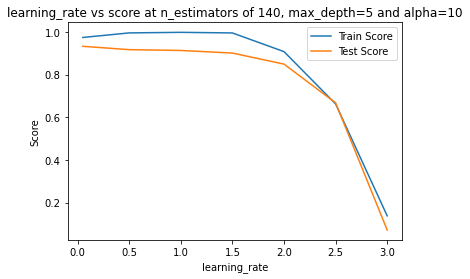

In [17]:
%timeit
learning_rate = [0.05, 0.5, 1, 1.5, 2, 2.5, 3]
train_scores = []
test_scores = []

for i in learning_rate:
    clf = XGBClassifier(learning_rate =i, n_estimators=140, max_depth=5, 
                    min_child_weight=1, gamma=0, alpha=10, 
                    nthread=4, scale_pos_weight=1, seed=27) 
    
    clf.fit(df_final_train,y_train)
    
    train_sc = f1_score(y_train,clf.predict(df_final_train))
    test_sc = f1_score(y_test,clf.predict(df_final_test))
    
    test_scores.append(test_sc)
    train_scores.append(train_sc)
    
    print('learning_rate = ', i, 'Train Score ',train_sc,'Test Score ',test_sc)
    
plt.plot(learning_rate, train_scores, label='Train Score')
plt.plot(learning_rate,test_scores, label='Test Score')
plt.xlabel('learning_rate')
plt.ylabel('Score')
plt.legend()
plt.title('learning_rate vs score at n_estimators of 140, max_depth=5 and alpha=10')

### Best number of estimators

[11:58:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
n_estimators =  1 Train Score  0.9262623677925622 Test Score  0.9250861755197294
[11:58:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
n_estimators =  5 Train Score  0.9262623677925622 Test Score  0.9250861755197294
[11:59:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 

Text(0.5, 1.0, 'n_estimators vs score at learning_rate=0.05, max_depth=5 and alpha=10')

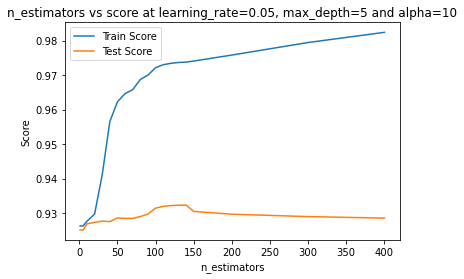

In [18]:
%timeit
# From above cell, our best learning rate is clearly 0.05
n_estimators = [1, 5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 200, 300, 400]
train_scores = []
test_scores = []

for i in n_estimators:
    clf = XGBClassifier(learning_rate =0.05, n_estimators=i, max_depth=5, 
                    min_child_weight=1, gamma=0, alpha=10, 
                    nthread=4, scale_pos_weight=1, seed=27) 
    
    clf.fit(df_final_train,y_train)
    
    train_sc = f1_score(y_train,clf.predict(df_final_train))
    test_sc = f1_score(y_test,clf.predict(df_final_test))
    
    test_scores.append(test_sc)
    train_scores.append(train_sc)
    
    print('n_estimators = ', i, 'Train Score ',train_sc,'Test Score ',test_sc)
    
plt.plot(n_estimators,train_scores, label='Train Score')
plt.plot(n_estimators,test_scores, label='Test Score')
plt.xlabel('n_estimators')
plt.ylabel('Score')
plt.legend()
plt.title('n_estimators vs score at learning_rate=0.05, max_depth=5 and alpha=10')

### Best maximum depth

[12:05:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
max_depth =  3 Train Score  0.9262623677925622 Test Score  0.9250861755197294
[12:05:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
max_depth =  4 Train Score  0.9262623677925622 Test Score  0.9250861755197294
[12:05:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error

Text(0.5, 1.0, 'max_depth vs score at learning_rate=0.05, n_estimators= and alpha=10')

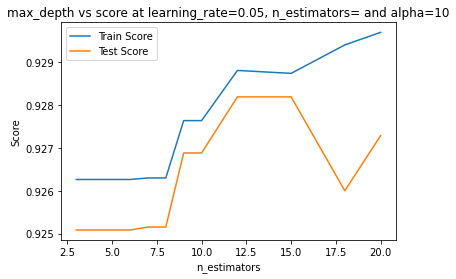

In [19]:
%timeit
# From above cell, our best learning rate=0.05, n_estimators=140
max_depth = [3, 4, 5, 6, 7, 8, 9, 10, 12, 15, 18, 20]
train_scores = []
test_scores = []

for i in max_depth:
    clf = XGBClassifier(learning_rate =0.05, n_estimators=i, max_depth=5, 
                    min_child_weight=1, gamma=0, alpha=10, 
                    nthread=4, scale_pos_weight=1, seed=27) 
    
    clf.fit(df_final_train,y_train)
    
    train_sc = f1_score(y_train,clf.predict(df_final_train))
    test_sc = f1_score(y_test,clf.predict(df_final_test))
    
    test_scores.append(test_sc)
    train_scores.append(train_sc)
    
    print('max_depth = ', i, 'Train Score ',train_sc,'Test Score ',test_sc)
    
plt.plot(max_depth,train_scores, label='Train Score')
plt.plot(max_depth,test_scores, label='Test Score')
plt.xlabel('n_estimators')
plt.ylabel('Score')
plt.legend()
plt.title('max_depth vs score at learning_rate=0.05, n_estimators= and alpha=10')

### Best minimum child weight

[12:06:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
min_child_weight =  1 Train Score  0.9288014539425438 Test Score  0.9281859869894423
[12:06:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
min_child_weight =  3 Train Score  0.9288014539425438 Test Score  0.9281859869894423
[12:06:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was chang

Text(0.5, 1.0, 'min_child_weight vs score at learning_rate=0.05, n_estimators=140, max_depth=12 and alpha=10')

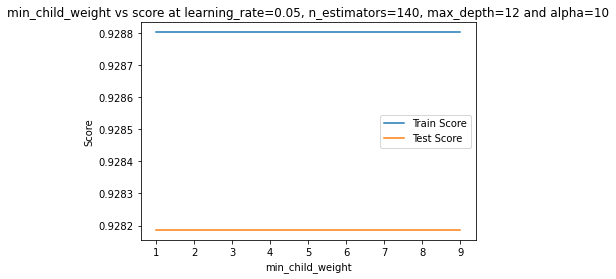

In [20]:
%timeit
# From above cell, our best learning rate=0.05, n_estimators=140, max_depth=12, min_
min_child_weight = [1, 3, 5, 7, 9]
train_scores = []
test_scores = []

for i in min_child_weight:
    clf = XGBClassifier(learning_rate =0.05, n_estimators=12, max_depth=5, 
                    min_child_weight=i, gamma=0, alpha=10, 
                    nthread=4, scale_pos_weight=1, seed=27) 
    
    clf.fit(df_final_train,y_train)
    
    train_sc = f1_score(y_train,clf.predict(df_final_train))
    test_sc = f1_score(y_test,clf.predict(df_final_test))
    
    test_scores.append(test_sc)
    train_scores.append(train_sc)
    
    print('min_child_weight = ', i, 'Train Score ',train_sc,'Test Score ',test_sc)
    
plt.plot(min_child_weight,train_scores, label='Train Score')
plt.plot(min_child_weight,test_scores, label='Test Score')
plt.xlabel('min_child_weight')
plt.ylabel('Score')
plt.legend()
plt.title('min_child_weight vs score at learning_rate=0.05, n_estimators=140, max_depth=12 and alpha=10')

### Best gamma

[12:06:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
gamma =  0.0 Train Score  0.9288014539425438 Test Score  0.9281859869894423
[12:06:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
gamma =  0.1 Train Score  0.9288014539425438 Test Score  0.9281859869894423
[12:06:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to

Text(0.5, 1.0, 'gamma vs score at learning_rate=0.05, n_estimators=140, max_depth=12, min_child_weight=1 and alpha=10')

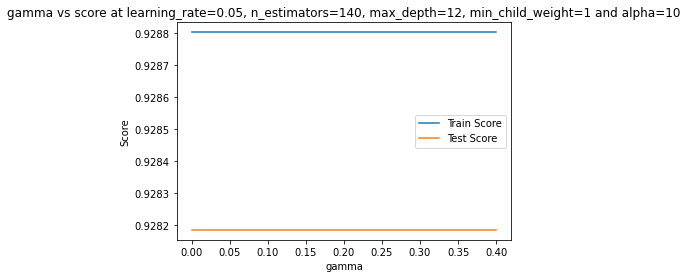

In [21]:
%timeit
# From above cell, our best learning rate=0.05, n_estimators=140, max_depth=12, min_child_weight=1, gamma=0
gamma = [i/10.0 for i in range(0,5)]
train_scores = []
test_scores = []

for i in gamma:
    clf = XGBClassifier(learning_rate =0.05, n_estimators=12, max_depth=5, 
                    min_child_weight=1, gamma=i, alpha=10, 
                    nthread=4, scale_pos_weight=1, seed=27) 
    
    clf.fit(df_final_train,y_train)
    
    train_sc = f1_score(y_train,clf.predict(df_final_train))
    test_sc = f1_score(y_test,clf.predict(df_final_test))
    
    test_scores.append(test_sc)
    train_scores.append(train_sc)
    
    print('gamma = ', i, 'Train Score ',train_sc,'Test Score ',test_sc)
    
plt.plot(gamma,train_scores, label='Train Score')
plt.plot(gamma,test_scores, label='Test Score')
plt.xlabel('gamma')
plt.ylabel('Score')
plt.legend()
plt.title('gamma vs score at learning_rate=0.05, n_estimators=140, max_depth=12, min_child_weight=1 and alpha=10')

In [ ]:
# learning rate=0.05, n_estimators=140, max_depth=12, min_child_weight=1, gamma=0

## Hyperparameter tuning with RandomizedSearchCV

In [34]:
%timeit
from scipy.stats import randint as sp_randint
from random import sample
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV

param_train = {'max_depth': sp_randint(2, 15),
               'learning_rate': sample((0.05, 3),1),
               'n_estimators': sp_randint(30, 150),
               'min_child_weight': sp_randint(2, 6),
               'validate_parameters' : [True, False] }

clf = XGBClassifier(gamma=0, alpha=10, subsample=0.8, colsample_bytree=0.8, 
                    nthread=4, scale_pos_weight=1, seed=27, eval_metric='mlogloss') 

xg_random = RandomizedSearchCV(clf, param_distributions = param_train, scoring='f1', n_jobs=4, cv=5)

xg_random.fit(df_final_train, y_train)

print('mean test scores', xg_random.cv_results_['mean_test_score'])
# print('mean train scores', xg_random.cv_results_['mean_train_score'])
print('best parameters ', xg_random.best_params_)
print('best f1', xg_random.best_score_)

mean test scores [0.97690628 0.97090705 0.97421065 0.97610591 0.97514177 0.97613674
 0.97680543 0.95786162 0.96646725 0.97516091]
best parameters  {'learning_rate': 0.05, 'max_depth': 11, 'min_child_weight': 3, 'n_estimators': 113, 'validate_parameters': True}
best auc 0.9769062827377892


In [ ]:
"""
mean test scores [0.97690628 0.97090705 0.97421065 0.97610591 0.97514177 0.97613674
 0.97680543 0.95786162 0.96646725 0.97516091]
best parameters  {'learning_rate': 0.05, 'max_depth': 11, 'min_child_weight': 3, 'n_estimators': 113, 'validate_parameters': True}
best auc 0.9769062827377892 
"""

In [36]:
print(xg_random.best_estimator_)

XGBClassifier(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, eval_metric='mlogloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.05, max_delta_step=0,
              max_depth=11, min_child_weight=3, missing=nan,
              monotone_constraints='()', n_estimators=113, n_jobs=4, nthread=4,
              num_parallel_tree=1, random_state=27, reg_alpha=10, reg_lambda=1,
              scale_pos_weight=1, seed=27, subsample=0.8, tree_method='exact',
              validate_parameters=True, verbosity=None)


In [38]:
clf = XGBClassifier(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, eval_metric='mlogloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.05, max_delta_step=0,
              max_depth=11, min_child_weight=3,
              monotone_constraints='()', n_estimators=113, n_jobs=4, nthread=4,
              num_parallel_tree=1, random_state=27, reg_alpha=10, reg_lambda=1,
              scale_pos_weight=1, seed=27, subsample=0.8, tree_method='exact',
              validate_parameters=True, verbosity=None)

In [39]:
clf.fit(df_final_train, y_train)
y_train_pred = clf.predict(df_final_train)
y_test_pred = clf.predict(df_final_test)

In [40]:
from sklearn.metrics import f1_score
print('Train f1 score', f1_score(y_train,y_train_pred))
print('Test f1 score', f1_score(y_test,y_test_pred))

Train f1 score 0.9817236060847389
Test f1 score 0.9326634863005023


In [41]:
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    
    A =(((C.T)/(C.sum(axis=1))).T) # Deriving precision and recall matrix from the conf matrix itself :o
    
    B =(C/C.sum(axis=0))
    plt.figure(figsize=(20,4))
    
    labels = [0,1]
    # representing A in heatmap format
    cmap=sns.light_palette("blue")
    plt.subplot(1, 3, 1)
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")
    
    plt.subplot(1, 3, 2)
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Precision matrix")
    
    plt.subplot(1, 3, 3)
    # representing B in heatmap format
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Recall matrix")
    
    plt.show()

Train confusion_matrix


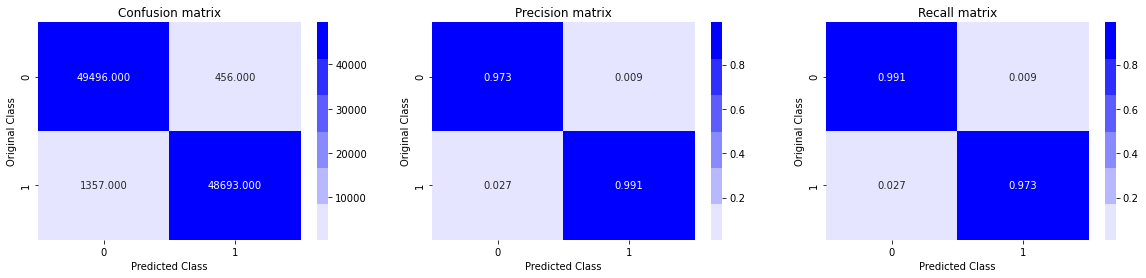

Test confusion_matrix


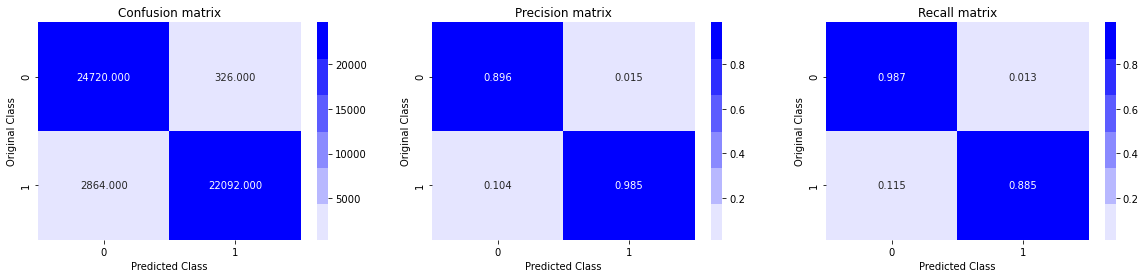

In [42]:
print('Train confusion_matrix')
plot_confusion_matrix(y_train,y_train_pred)
print('Test confusion_matrix')
plot_confusion_matrix(y_test,y_test_pred)

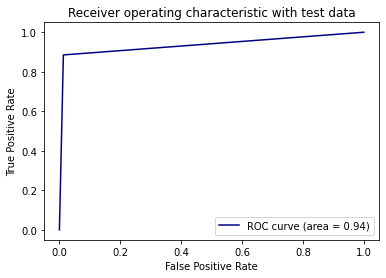

In [43]:
from sklearn.metrics import roc_curve, auc
fpr,tpr,ths = roc_curve(y_test, y_test_pred)
auc_sc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='navy', label='ROC curve (area = %0.2f)' % auc_sc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic with test data')
plt.legend()
plt.show()

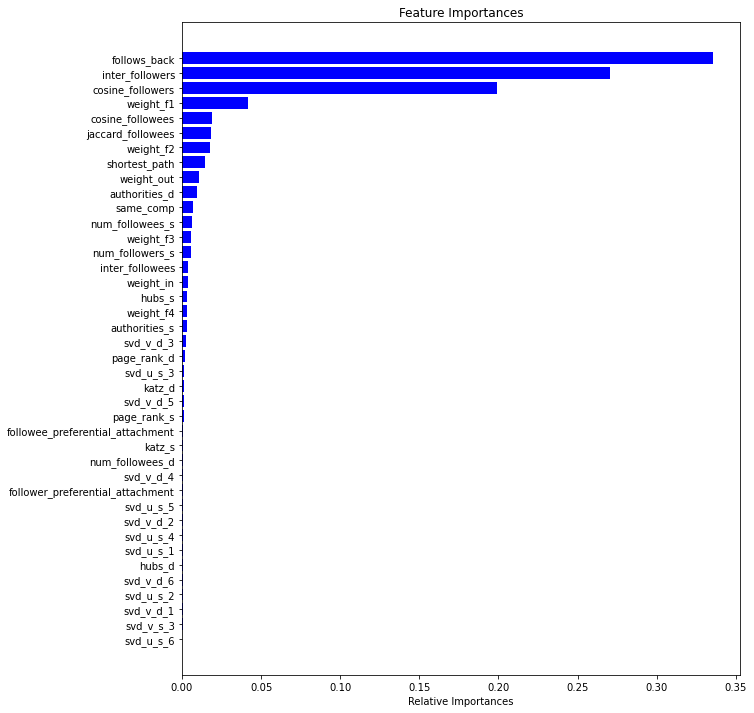

In [49]:
features = df_final_train.columns
importances = clf.feature_importances_
indices = (np.argsort(importances))[-40:]
plt.figure(figsize=(10,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importances')
plt.show()

In [ ]:
# Turns out follower/followee preferential attachment was pretty useless